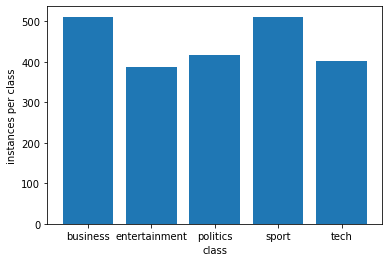

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import math
import os
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from collections import Counter

#-------------Step 2: Plot instances per class-------------#

#Create a list of strings that contains the 5 classes in the BBC News Site.
ctg = ['business', 'entertainment', 'politics', 'sport', 'tech']
#Create an empty list to store the number of instances per class.
numFilesPerCtg = []

#Count Files in Business Directory
business_folder_path = 'BBC/business'
dirListing = os.listdir(business_folder_path)
numFilesPerCtg.append(len(dirListing))

#Count Files in Entertainment Directory
entertainment_folder_path = 'BBC/entertainment'
dirListing = os.listdir(entertainment_folder_path)
numFilesPerCtg.append(len(dirListing))

#Count Files in Politics Directory
politics_folder_path = 'BBC/politics'
dirListing = os.listdir(politics_folder_path)
numFilesPerCtg.append(len(dirListing))

#Count Files in Sport Directory
sport_folder_path = 'BBC/sport'
dirListing = os.listdir(sport_folder_path)
numFilesPerCtg.append(len(dirListing))

#Count Files in Tech Directory
tech_folder_path = 'BBC/tech'
dirListing = os.listdir(tech_folder_path)
numFilesPerCtg.append(len(dirListing))

#Plot bar graph of the number of instances per class.
plt.bar(ctg, numFilesPerCtg)
plt.xlabel('class')
plt.ylabel('instances per class')

#Save graph to a PDF file
plt.savefig("BBC-distribution.pdf")

#-------------Step3: Load dataset-------------#
dataset = load_files("BBC", categories = ctg, encoding = 'latin1')

#-------------Step4: Pre-process the dataset-------------#
vectorizer = CountVectorizer()
cv_fit = vectorizer.fit_transform(dataset.data)

#-------------Step5: Split into Training and Testing Set-------------#
X_train, X_test, y_train, y_test = train_test_split(cv_fit, dataset.target, train_size=0.80, test_size=0.20, random_state=None)

#-------------Step6: Train a multinomial Naive Bayes Classifier on the training set-------------#
multinomialNaiveBayes = MultinomialNB()
multinomialNaiveBayes.fit(X_train, y_train)
y_predict = multinomialNaiveBayes.predict(X_test)

#-------------Step7: BBC Performance-------------#

#open txt file
open("bbc-performance.txt", "w").close()
performance_file = open('bbc-performance.txt', 'a')

#--(a)A clear seperator describing the model--#
performance_file.write('-------------------------------------\n')
performance_file.write('Multi-nomialNB default values, try 1\n')
performance_file.write('-------------------------------------\n')

#--(b)Confusion Matrix--#
cm = confusion_matrix(y_test, y_predict)
performance_file.write('(b)\n')
for item in cm:
        performance_file.write("%s\n" % item)
performance_file.write('\n')

#--(c)Find Precision, Recall, F1-measure for each class--#
target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
performance_file.write('(c)\n')
performance_file.write(classification_report(y_test, y_predict, target_names=target_names))
performance_file.write('\n')

#--(d)Find Accuracy, Macro-Average F1 and Weighted-Average F1 of the moodel--#
accuracy = str(accuracy_score(y_test, y_predict))
performance_file.write('(d)\n')
performance_file.write('accuracy: ' + accuracy + "\n")

macro = str(f1_score(y_test, y_predict, average='macro'))
performance_file.write('macro-average F1: ' + macro + "\n")

weighted = str(f1_score(y_test, y_predict, average='weighted'))
performance_file.write('weighted-average F1: ' + weighted + "\n\n")

#--(e)Find prior probability of each class--#
priors = multinomialNaiveBayes.class_log_prior_
performance_file.write('(e)\n')
performance_file.write("\nP(business)= " + str(priors[0]))
performance_file.write("\nP(entertainment)= " + str(priors[1]))
performance_file.write("\nP(politics)= " + str(priors[2]))
performance_file.write("\nP(sport)= " + str(priors[3]))
performance_file.write("\nP(tech)= " + str(priors[4]))
performance_file.write('\n\n')

#--(f)The size of the vocabulary--#
performance_file.write('(f)\n')
sizeVocab = multinomialNaiveBayes.n_features_in_
performance_file.write('size of vocabulary: ' + str(sizeVocab) + '\n\n')

#--(g)The number of word-tokens in each class--#
performance_file.write('(g)\n')
#get word frequency per class
wordFredPerClass = multinomialNaiveBayes.feature_count_
performance_file.write('Number of words in business: ' + str(wordFredPerClass[0].sum(axis=0)) + '\n')
performance_file.write('Number of words in entertainment: ' + str(wordFredPerClass[1].sum(axis=0)) + '\n')
performance_file.write('Number of words in politics: ' + str(wordFredPerClass[2].sum(axis=0)) + '\n')
performance_file.write('Number of words in sport: ' + str(wordFredPerClass[3].sum(axis=0)) + '\n')
performance_file.write('Number of words in tech: ' + str(wordFredPerClass[4].sum(axis=0)) + '\n\n')

#--(h)The number of word-tokens in the entire corpus--#
performance_file.write('(h)\n')
wordFreq = cv_fit.toarray().sum(axis=0)
performance_file.write('The number of word tokens for the entire corpus: ' + str(wordFreq.sum(axis=0)) + '\n\n')

#--(i)The number and percentage of words with a frequency of zero in each class--#
performance_file.write('(i)\n')

#count business

#We know how many words are in business 
wordsInBusiness = wordFredPerClass[0].sum(axis=0)

#And we can find the amount of zeros through subtraction
#Take amount of articles x size of the vocabulary
#Then subtract it by the amount of words that show up in business
totalAmtWords = 510 * sizeVocab
frqZero = totalAmtWords - wordsInBusiness
performance_file.write('Number of words in business with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in business with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count entertainment
wordsInEntertainment = wordFredPerClass[1].sum(axis=0)

totalAmtWords = 386 * sizeVocab
frqZero = totalAmtWords - wordsInEntertainment
performance_file.write('Number of words in entertainment with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in entertainment with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count politics
wordsInPolitics = wordFredPerClass[2].sum(axis=0)

totalAmtWords = 417 * sizeVocab
frqZero = totalAmtWords - wordsInPolitics
performance_file.write('Number of words in politics with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in politics with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count sport
wordsInSport = wordFredPerClass[3].sum(axis=0)

totalAmtWords = 511 * sizeVocab
frqZero = totalAmtWords - wordsInSport
performance_file.write('Number of words in sport with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in sport with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count tech
wordsInTech = wordFredPerClass[4].sum(axis=0)

totalAmtWords = 401 * sizeVocab
frqZero = totalAmtWords - wordsInTech
performance_file.write('Number of words in tech with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in tech with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#--(j)The number and percentage of words with a frequency of one in the entire corpus--#
performance_file.write('(j)\n')
performance_file.write('Number of words with frequency 1: ' + str(np.count_nonzero(cv_fit.toarray() == 1)) + "\n")
totalAmtWords = 2225 * sizeVocab
performance_file.write('Percentage of words with frequency 1: ' + str(np.count_nonzero(cv_fit.toarray() == 1) / totalAmtWords) + "\n\n")

#--(k)Your 2 favorite words (that are present in the vocabulary) and their log-prob--#
performance_file.write('(k)\n')
#Sum up all words
result = [sum(x) for x in zip(*cv_fit.toarray())]

#Find the frequency of favorite words
#'athletic' has index 3000
athletic = result[3000]
#'goalscorer' has index 12000
goalscorer = result[12000]

#Find probability of each word
athleticProb = athletic/totalAmtWords
goalscorerProb = goalscorer/totalAmtWords

#Find log probability of each word
performance_file.write('Log Probability of\'athletic\': ' + str(math.log(10,athleticProb)) + "\n")
performance_file.write('Log Probability of\'athletic\': ' + str(math.log(10,goalscorerProb)) + "\n\n")



#-------------Step6: Train a multinomial Naive Bayes Classifier on the training set-------------#
multinomialNaiveBayes = MultinomialNB()
multinomialNaiveBayes.fit(X_train, y_train)
y_predict = multinomialNaiveBayes.predict(X_test)

#-------------Step7: BBC Performance-------------#

#--(a)A clear seperator describing the model--#
performance_file.write('-------------------------------------\n')
performance_file.write('Multi-nomialNB default values, try 2\n')
performance_file.write('-------------------------------------\n')

#--(b)Confusion Matrix--#
cm = confusion_matrix(y_test, y_predict)
performance_file.write('(b)\n')
for item in cm:
        performance_file.write("%s\n" % item)
performance_file.write('\n')

#--(c)Find Precision, Recall, F1-measure for each class--#
target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
performance_file.write('(c)\n')
performance_file.write(classification_report(y_test, y_predict, target_names=target_names))
performance_file.write('\n')

#--(d)Find Accuracy, Macro-Average F1 and Weighted-Average F1 of the moodel--#
accuracy = str(accuracy_score(y_test, y_predict))
performance_file.write('(d)\n')
performance_file.write('accuracy: ' + accuracy + "\n")

macro = str(f1_score(y_test, y_predict, average='macro'))
performance_file.write('macro-average F1: ' + macro + "\n")

weighted = str(f1_score(y_test, y_predict, average='weighted'))
performance_file.write('weighted-average F1: ' + weighted + "\n\n")

#--(e)Find prior probability of each class--#
priors = multinomialNaiveBayes.class_log_prior_
performance_file.write('(e)\n')
performance_file.write("\nP(business)= " + str(priors[0]))
performance_file.write("\nP(entertainment)= " + str(priors[1]))
performance_file.write("\nP(politics)= " + str(priors[2]))
performance_file.write("\nP(sport)= " + str(priors[3]))
performance_file.write("\nP(tech)= " + str(priors[4]))
performance_file.write('\n\n')

#--(f)The size of the vocabulary--#
performance_file.write('(f)\n')
sizeVocab = multinomialNaiveBayes.n_features_in_
performance_file.write('size of vocabulary: ' + str(sizeVocab) + '\n\n')

#--(g)The number of word-tokens in each class--#
performance_file.write('(g)\n')
#get word frequency per class
wordFredPerClass = multinomialNaiveBayes.feature_count_
performance_file.write('Number of words in business: ' + str(wordFredPerClass[0].sum(axis=0)) + '\n')
performance_file.write('Number of words in entertainment: ' + str(wordFredPerClass[1].sum(axis=0)) + '\n')
performance_file.write('Number of words in politics: ' + str(wordFredPerClass[2].sum(axis=0)) + '\n')
performance_file.write('Number of words in sport: ' + str(wordFredPerClass[3].sum(axis=0)) + '\n')
performance_file.write('Number of words in tech: ' + str(wordFredPerClass[4].sum(axis=0)) + '\n\n')

#--(h)The number of word-tokens in the entire corpus--#
performance_file.write('(h)\n')
wordFreq = cv_fit.toarray().sum(axis=0)
performance_file.write('The number of word tokens for the entire corpus: ' + str(wordFreq.sum(axis=0)) + '\n\n')

#--(i)The number and percentage of words with a frequency of zero in each class--#
performance_file.write('(i)\n')

#count business

#We know how many words are in business 
wordsInBusiness = wordFredPerClass[0].sum(axis=0)

#And we can find the amount of zeros through subtraction
#Take amount of articles x size of the vocabulary
#Then subtract it by the amount of words that show up in business
totalAmtWords = 510 * sizeVocab
frqZero = totalAmtWords - wordsInBusiness
performance_file.write('Number of words in business with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in business with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count entertainment
wordsInEntertainment = wordFredPerClass[1].sum(axis=0)

totalAmtWords = 386 * sizeVocab
frqZero = totalAmtWords - wordsInEntertainment
performance_file.write('Number of words in entertainment with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in entertainment with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count politics
wordsInPolitics = wordFredPerClass[2].sum(axis=0)

totalAmtWords = 417 * sizeVocab
frqZero = totalAmtWords - wordsInPolitics
performance_file.write('Number of words in politics with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in politics with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count sport
wordsInSport = wordFredPerClass[3].sum(axis=0)

totalAmtWords = 511 * sizeVocab
frqZero = totalAmtWords - wordsInSport
performance_file.write('Number of words in sport with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in sport with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count tech
wordsInTech = wordFredPerClass[4].sum(axis=0)

totalAmtWords = 401 * sizeVocab
frqZero = totalAmtWords - wordsInTech
performance_file.write('Number of words in tech with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in tech with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#--(j)The number and percentage of words with a frequency of one in the entire corpus--#
performance_file.write('(j)\n')
performance_file.write('Number of words with frequency 1: ' + str(np.count_nonzero(cv_fit.toarray() == 1)) + "\n")
totalAmtWords = 2225 * sizeVocab
performance_file.write('Percentage of words with frequency 1: ' + str(np.count_nonzero(cv_fit.toarray() == 1) / totalAmtWords) + "\n\n")

#--(k)Your 2 favorite words (that are present in the vocabulary) and their log-prob--#
performance_file.write('(k)\n')
#Sum up all words
result = [sum(x) for x in zip(*cv_fit.toarray())]

#Find the frequency of favorite words
#'athletic' has index 3000
athletic = result[3000]
#'goalscorer' has index 12000
goalscorer = result[12000]

#Find probability of each word
athleticProb = athletic/totalAmtWords
goalscorerProb = goalscorer/totalAmtWords

#Find log probability of each word
performance_file.write('Log Probability of\'athletic\': ' + str(math.log(10,athleticProb)) + "\n")
performance_file.write('Log Probability of\'athletic\': ' + str(math.log(10,goalscorerProb)) + "\n\n")

#-------------Step6: Train a multinomial Naive Bayes Classifier on the training set-------------#
multinomialNaiveBayes = MultinomialNB(alpha = 0.0001)
multinomialNaiveBayes.fit(X_train, y_train)
y_predict = multinomialNaiveBayes.predict(X_test)

#-------------Step7: BBC Performance-------------#

#--(a)A clear seperator describing the model--#
performance_file.write('-------------------------------------\n')
performance_file.write('Multi-nomialNB default values, try 3 smooting 0.0001\n')
performance_file.write('-------------------------------------\n')

#--(b)Confusion Matrix--#
cm = confusion_matrix(y_test, y_predict)
performance_file.write('(b)\n')
for item in cm:
        performance_file.write("%s\n" % item)
performance_file.write('\n')

#--(c)Find Precision, Recall, F1-measure for each class--#
target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
performance_file.write('(c)\n')
performance_file.write(classification_report(y_test, y_predict, target_names=target_names))
performance_file.write('\n')

#--(d)Find Accuracy, Macro-Average F1 and Weighted-Average F1 of the moodel--#
accuracy = str(accuracy_score(y_test, y_predict))
performance_file.write('(d)\n')
performance_file.write('accuracy: ' + accuracy + "\n")

macro = str(f1_score(y_test, y_predict, average='macro'))
performance_file.write('macro-average F1: ' + macro + "\n")

weighted = str(f1_score(y_test, y_predict, average='weighted'))
performance_file.write('weighted-average F1: ' + weighted + "\n\n")

#--(e)Find prior probability of each class--#
priors = multinomialNaiveBayes.class_log_prior_
performance_file.write('(e)\n')
performance_file.write("\nP(business)= " + str(priors[0]))
performance_file.write("\nP(entertainment)= " + str(priors[1]))
performance_file.write("\nP(politics)= " + str(priors[2]))
performance_file.write("\nP(sport)= " + str(priors[3]))
performance_file.write("\nP(tech)= " + str(priors[4]))
performance_file.write('\n\n')

#--(f)The size of the vocabulary--#
performance_file.write('(f)\n')
sizeVocab = multinomialNaiveBayes.n_features_in_
performance_file.write('size of vocabulary: ' + str(sizeVocab) + '\n\n')

#--(g)The number of word-tokens in each class--#
performance_file.write('(g)\n')
#get word frequency per class
wordFredPerClass = multinomialNaiveBayes.feature_count_
performance_file.write('Number of words in business: ' + str(wordFredPerClass[0].sum(axis=0)) + '\n')
performance_file.write('Number of words in entertainment: ' + str(wordFredPerClass[1].sum(axis=0)) + '\n')
performance_file.write('Number of words in politics: ' + str(wordFredPerClass[2].sum(axis=0)) + '\n')
performance_file.write('Number of words in sport: ' + str(wordFredPerClass[3].sum(axis=0)) + '\n')
performance_file.write('Number of words in tech: ' + str(wordFredPerClass[4].sum(axis=0)) + '\n\n')

#--(h)The number of word-tokens in the entire corpus--#
performance_file.write('(h)\n')
wordFreq = cv_fit.toarray().sum(axis=0)
performance_file.write('The number of word tokens for the entire corpus: ' + str(wordFreq.sum(axis=0)) + '\n\n')

#--(i)The number and percentage of words with a frequency of zero in each class--#
performance_file.write('(i)\n')

#count business

#We know how many words are in business 
wordsInBusiness = wordFredPerClass[0].sum(axis=0)

#And we can find the amount of zeros through subtraction
#Take amount of articles x size of the vocabulary
#Then subtract it by the amount of words that show up in business
totalAmtWords = 510 * sizeVocab
frqZero = totalAmtWords - wordsInBusiness
performance_file.write('Number of words in business with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in business with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count entertainment
wordsInEntertainment = wordFredPerClass[1].sum(axis=0)

totalAmtWords = 386 * sizeVocab
frqZero = totalAmtWords - wordsInEntertainment
performance_file.write('Number of words in entertainment with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in entertainment with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count politics
wordsInPolitics = wordFredPerClass[2].sum(axis=0)

totalAmtWords = 417 * sizeVocab
frqZero = totalAmtWords - wordsInPolitics
performance_file.write('Number of words in politics with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in politics with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count sport
wordsInSport = wordFredPerClass[3].sum(axis=0)

totalAmtWords = 511 * sizeVocab
frqZero = totalAmtWords - wordsInSport
performance_file.write('Number of words in sport with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in sport with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count tech
wordsInTech = wordFredPerClass[4].sum(axis=0)

totalAmtWords = 401 * sizeVocab
frqZero = totalAmtWords - wordsInTech
performance_file.write('Number of words in tech with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in tech with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#--(j)The number and percentage of words with a frequency of one in the entire corpus--#
performance_file.write('(j)\n')
performance_file.write('Number of words with frequency 1: ' + str(np.count_nonzero(cv_fit.toarray() == 1)) + "\n")
totalAmtWords = 2225 * sizeVocab
performance_file.write('Percentage of words with frequency 1: ' + str(np.count_nonzero(cv_fit.toarray() == 1) / totalAmtWords) + "\n\n")

#--(k)Your 2 favorite words (that are present in the vocabulary) and their log-prob--#
performance_file.write('(k)\n')
#Sum up all words
result = [sum(x) for x in zip(*cv_fit.toarray())]

#Find the frequency of favorite words
#'athletic' has index 3000
athletic = result[3000]
#'goalscorer' has index 12000
goalscorer = result[12000]

#Find probability of each word
athleticProb = athletic/totalAmtWords
goalscorerProb = goalscorer/totalAmtWords

#Find log probability of each word
performance_file.write('Log Probability of\'athletic\': ' + str(math.log(10,athleticProb)) + "\n")
performance_file.write('Log Probability of\'athletic\': ' + str(math.log(10,goalscorerProb)) + "\n\n")

#-------------Step6: Train a multinomial Naive Bayes Classifier on the training set-------------#
multinomialNaiveBayes = MultinomialNB(alpha = 0.9)
multinomialNaiveBayes.fit(X_train, y_train)
y_predict = multinomialNaiveBayes.predict(X_test)

#-------------Step7: BBC Performance-------------#

#--(a)A clear seperator describing the model--#
performance_file.write('-------------------------------------\n')
performance_file.write('Multi-nomialNB default values, try 4 (smoothing 0.9)\n')
performance_file.write('-------------------------------------\n')

#--(b)Confusion Matrix--#
cm = confusion_matrix(y_test, y_predict)
performance_file.write('(b)\n')
for item in cm:
        performance_file.write("%s\n" % item)
performance_file.write('\n')

#--(c)Find Precision, Recall, F1-measure for each class--#
target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
performance_file.write('(c)\n')
performance_file.write(classification_report(y_test, y_predict, target_names=target_names))
performance_file.write('\n')

#--(d)Find Accuracy, Macro-Average F1 and Weighted-Average F1 of the moodel--#
accuracy = str(accuracy_score(y_test, y_predict))
performance_file.write('(d)\n')
performance_file.write('accuracy: ' + accuracy + "\n")

macro = str(f1_score(y_test, y_predict, average='macro'))
performance_file.write('macro-average F1: ' + macro + "\n")

weighted = str(f1_score(y_test, y_predict, average='weighted'))
performance_file.write('weighted-average F1: ' + weighted + "\n\n")

#--(e)Find prior probability of each class--#
priors = multinomialNaiveBayes.class_log_prior_
performance_file.write('(e)\n')
performance_file.write("\nP(business)= " + str(priors[0]))
performance_file.write("\nP(entertainment)= " + str(priors[1]))
performance_file.write("\nP(politics)= " + str(priors[2]))
performance_file.write("\nP(sport)= " + str(priors[3]))
performance_file.write("\nP(tech)= " + str(priors[4]))
performance_file.write('\n\n')

#--(f)The size of the vocabulary--#
performance_file.write('(f)\n')
sizeVocab = multinomialNaiveBayes.n_features_in_
performance_file.write('size of vocabulary: ' + str(sizeVocab) + '\n\n')

#--(g)The number of word-tokens in each class--#
performance_file.write('(g)\n')
#get word frequency per class
wordFredPerClass = multinomialNaiveBayes.feature_count_
performance_file.write('Number of words in business: ' + str(wordFredPerClass[0].sum(axis=0)) + '\n')
performance_file.write('Number of words in entertainment: ' + str(wordFredPerClass[1].sum(axis=0)) + '\n')
performance_file.write('Number of words in politics: ' + str(wordFredPerClass[2].sum(axis=0)) + '\n')
performance_file.write('Number of words in sport: ' + str(wordFredPerClass[3].sum(axis=0)) + '\n')
performance_file.write('Number of words in tech: ' + str(wordFredPerClass[4].sum(axis=0)) + '\n\n')

#--(h)The number of word-tokens in the entire corpus--#
performance_file.write('(h)\n')
wordFreq = cv_fit.toarray().sum(axis=0)
performance_file.write('The number of word tokens for the entire corpus: ' + str(wordFreq.sum(axis=0)) + '\n\n')

#--(i)The number and percentage of words with a frequency of zero in each class--#
performance_file.write('(i)\n')

#count business

#We know how many words are in business 
wordsInBusiness = wordFredPerClass[0].sum(axis=0)

#And we can find the amount of zeros through subtraction
#Take amount of articles x size of the vocabulary
#Then subtract it by the amount of words that show up in business
totalAmtWords = 510 * sizeVocab
frqZero = totalAmtWords - wordsInBusiness
performance_file.write('Number of words in business with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in business with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count entertainment
wordsInEntertainment = wordFredPerClass[1].sum(axis=0)

totalAmtWords = 386 * sizeVocab
frqZero = totalAmtWords - wordsInEntertainment
performance_file.write('Number of words in entertainment with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in entertainment with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count politics
wordsInPolitics = wordFredPerClass[2].sum(axis=0)

totalAmtWords = 417 * sizeVocab
frqZero = totalAmtWords - wordsInPolitics
performance_file.write('Number of words in politics with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in politics with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count sport
wordsInSport = wordFredPerClass[3].sum(axis=0)

totalAmtWords = 511 * sizeVocab
frqZero = totalAmtWords - wordsInSport
performance_file.write('Number of words in sport with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in sport with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#count tech
wordsInTech = wordFredPerClass[4].sum(axis=0)

totalAmtWords = 401 * sizeVocab
frqZero = totalAmtWords - wordsInTech
performance_file.write('Number of words in tech with frequency zero: ' + str(frqZero) + "\n")
performance_file.write('Percentage of words in tech with frequency zero: ' + str(frqZero / totalAmtWords) + "%\n\n")

#--(j)The number and percentage of words with a frequency of one in the entire corpus--#
performance_file.write('(j)\n')
performance_file.write('Number of words with frequency 1: ' + str(np.count_nonzero(cv_fit.toarray() == 1)) + "\n")
totalAmtWords = 2225 * sizeVocab
performance_file.write('Percentage of words with frequency 1: ' + str(np.count_nonzero(cv_fit.toarray() == 1) / totalAmtWords) + "\n\n")

#--(k)Your 2 favorite words (that are present in the vocabulary) and their log-prob--#
performance_file.write('(k)\n')
#Sum up all words
result = [sum(x) for x in zip(*cv_fit.toarray())]

#Find the frequency of favorite words
#'athletic' has index 3000
athletic = result[3000]
#'goalscorer' has index 12000
goalscorer = result[12000]

#Find probability of each word
athleticProb = athletic/totalAmtWords
goalscorerProb = goalscorer/totalAmtWords

#Find log probability of each word
performance_file.write('Log Probability of\'athletic\': ' + str(math.log(10,athleticProb)) + "\n")
performance_file.write('Log Probability of\'athletic\': ' + str(math.log(10,goalscorerProb)) + "\n\n")

#close file
performance_file.close()

#--Step 8
open("bbc-discussion.txt", "w").close()
discussion_file = open('bbc-discussion.txt', 'a')

discussion_file.write('The distribution of articles amongst the classes is relatively balanced. This means that each class is well represented in this dataset\n' + 
                     ('and carries equal importance. As such, accuracy is more well-suited for this dataset (over Recall, Precision & F-measure).\n\n'))

discussion_file.write('The performance of steps 8-10 differed from one another when we involved data that was predicted by the classifier. This means that\n' +
                     ('metrics like Recall, Precision, F1-measure, etc... were different because the results of the prediction changed after each trial.\n') +
                     ('On the other hand, steps that involve the entire corpus like vocabulary size (f) or number of words with frequency 1 over the entire\n') +
                     ('corpus (j) would remain the same from one trial to another.'))

discussion_file.close()